In [ ]:
import torch
from torch.utils.data import DataLoader
from torch import nn

import math
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(12,12)})

<Axes: >

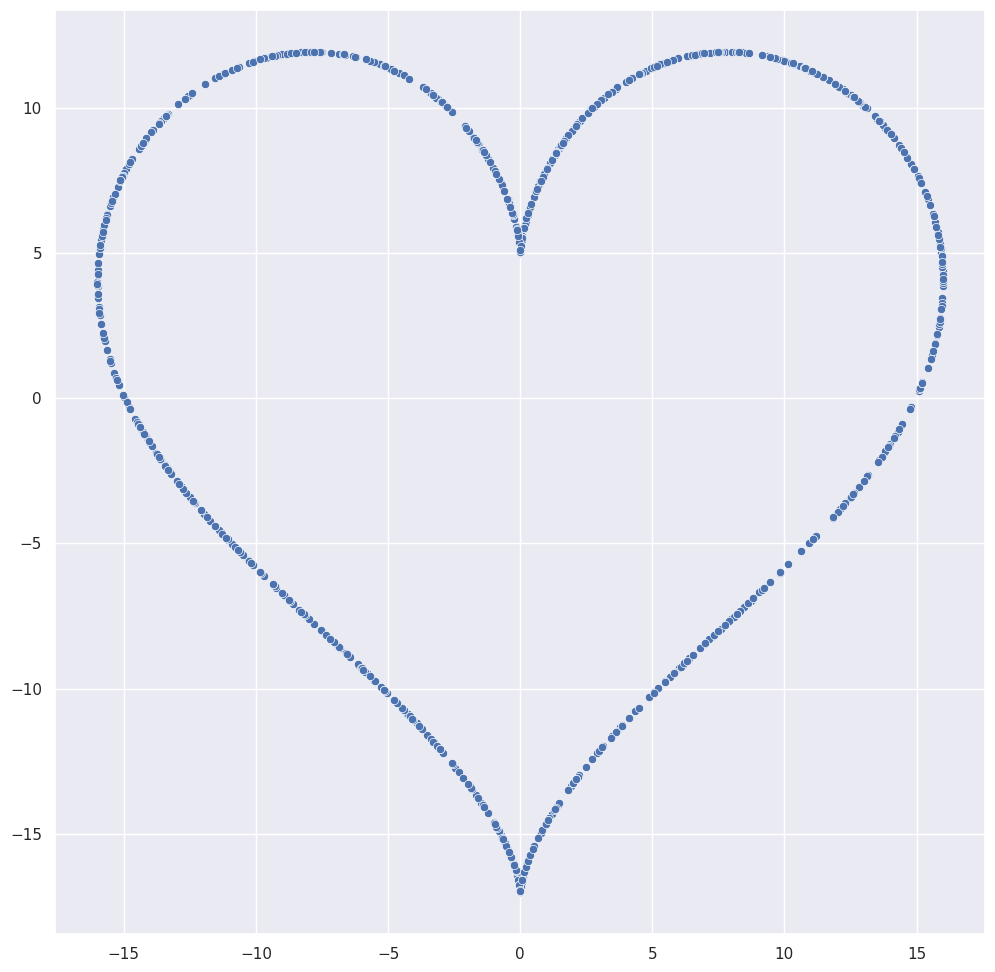

In [ ]:
TRAIN_DATA_COUNT = 1024
theta = np.array([uniform(0, 2 * np.pi) for _ in range(TRAIN_DATA_COUNT)])

x = 16 * ( np.sin(theta) ** 3 )
y = 13 * np.cos(theta) - 5 * np.cos(2*theta) - 2 * np.cos(3*theta) - np.cos(4*theta)
sns.scatterplot(x=x, y=y)

In [ ]:
train_data = torch.Tensor(np.stack((x, y), axis=1))

train_labels = torch.zeros(TRAIN_DATA_COUNT)
train_set = [
    (train_data[i], train_labels[i]) for i in range(TRAIN_DATA_COUNT)
]

In [ ]:
BATCH_SIZE = 64
train_loader = DataLoader(
    train_set, batch_size=BATCH_SIZE, shuffle=True
)

In [ ]:
discriminator = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

generator = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

In [ ]:
# %% training
LR = 0.001
NUM_EPOCHS = 2
loss_function = nn.BCELoss()
optimizer_discriminator = torch.optim.Adam(discriminator.parameters())
optimizer_generator = torch.optim.Adam(generator.parameters())

In [ ]:
# %% training
LR = 0.001
NUM_EPOCHS = 2000
loss_function = nn.BCELoss()
optimizer_discriminator = torch.optim.Adam(discriminator.parameters())
optimizer_generator = torch.optim.Adam(generator.parameters())


for epoch in range(NUM_EPOCHS):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((BATCH_SIZE, 1))
        latent_space_samples = torch.randn((BATCH_SIZE, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((BATCH_SIZE, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        if epoch % 2 == 0:
            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(
                output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

        if epoch % 2 == 1:
            # Data for training the generator
            latent_space_samples = torch.randn((BATCH_SIZE, 2))

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(
                output_discriminator_generated, real_samples_labels
            )
            loss_generator.backward()
            optimizer_generator.step()


#            if epoch % 10 == 0:
#                print(epoch)
#                print(f"Epoch {epoch}, Discriminator Loss {loss_discriminator}")
#                print(f"Epoch {epoch}, Generator Loss {loss_generator}")
#                with torch.no_grad():
#                    latent_space_samples = torch.randn(1000, 2)
#                    generated_samples = generator(latent_space_samples).detach()
#                plt.figure()
#                plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
#                plt.xlim((-20, 20))
#                plt.ylim((-20, 15))
#                plt.text(10, 15, f"Epoch {epoch}")
#                plt.savefig(f"train_progress/image{str(epoch).zfill(3)}.jpg")



Text(10, 15, 'Epoch 1999')

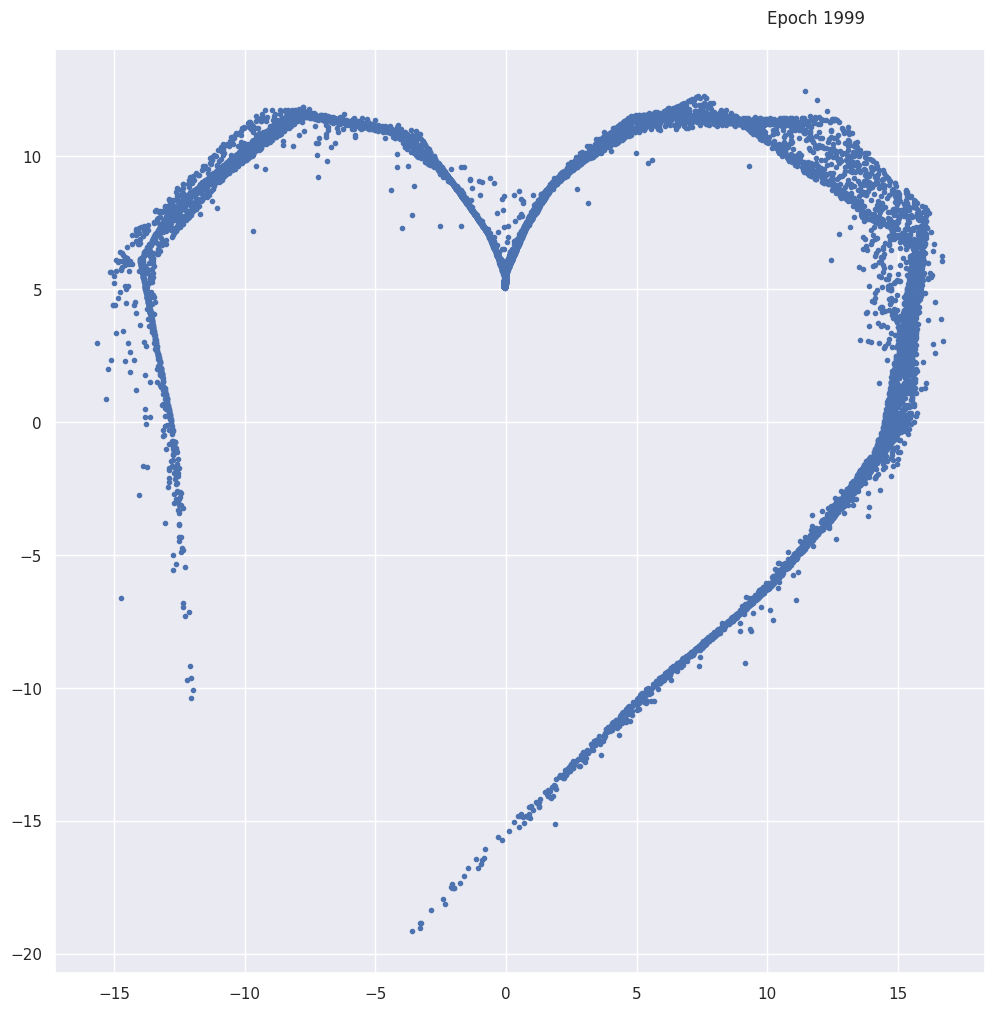

In [ ]:
# %% check the result
latent_space_samples = torch.randn(10000, 2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")
plt.text(10, 15, f"Epoch {epoch}")
